# MobileNet Based Model

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np

In [2]:
tf.get_logger().setLevel('ERROR')

In [2]:
from tensorflow.keras.applications import MobileNetV2
from notebooks.load_dataset.load_dataset import x_test, y_test, x_train, y_train, classes
from results.functions import visualize_predictions, history_plot

e:\Goit\projects\Data_Science_core\final_data_project\ds_project


In [4]:
conv_base = MobileNetV2(weights='imagenet', include_top=False)

In [5]:
conv_base.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 Conv1 (Conv2D)                 (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, None, None,   128         ['Conv1[0][0]']                  
                                32)                                            

In [6]:
conv_base.trainable = False

In [7]:
# making shure that the layers are frozen
conv_base.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 Conv1 (Conv2D)                 (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, None, None,   128         ['Conv1[0][0]']                  
                                32)                                            

In [8]:
model = keras.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Rescaling(1. / 255),
    layers.Resizing(224, 224),
    conv_base,
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])

In [9]:
# full model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, None, None, 1280)  2257984  
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 128)               8028288   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

In [10]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        "../models/mn_model.keras",
        save_best_only=True,
        monitor="val_loss",
        verbose=2),
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=10,
        verbose=2
    )
]

In [11]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.0001)
loss = keras.losses.SparseCategoricalCrossentropy()
metrics = ["accuracy"]

In [12]:
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [13]:
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=callbacks)

Epoch 1/50
625/625 [==============================] - ETA: 0s - loss: 1.1685 - accuracy: 0.6373
Epoch 1: val_loss improved from inf to 0.68558, saving model to ../models\mn_model.keras
625/625 [==============================] - 38s 52ms/step - loss: 1.1685 - accuracy: 0.6373 - val_loss: 0.6856 - val_accuracy: 0.7798
Epoch 2/50
625/625 [==============================] - ETA: 0s - loss: 0.8228 - accuracy: 0.7440
Epoch 2: val_loss improved from 0.68558 to 0.66542, saving model to ../models\mn_model.keras
625/625 [==============================] - 31s 50ms/step - loss: 0.8228 - accuracy: 0.7440 - val_loss: 0.6654 - val_accuracy: 0.8077
Epoch 3/50
625/625 [==============================] - ETA: 0s - loss: 0.7084 - accuracy: 0.7794
Epoch 3: val_loss improved from 0.66542 to 0.61841, saving model to ../models\mn_model.keras
625/625 [==============================] - 32s 51ms/step - loss: 0.7084 - accuracy: 0.7794 - val_loss: 0.6184 - val_accuracy: 0.8142
Epoch 4/50
625/625 [==================

In [14]:
model = tf.keras.models.load_model("../models/mn_model.keras")

model.evaluate(x_test, y_test)

313/313 [==============================] - 8s 23ms/step - loss: 0.6081 - accuracy: 0.8214


[0.6081263422966003, 0.821399986743927]

1/1 [==============================] - 1s 856ms/step
 Labels:      [9 5 6 3 8 6 9 8 5 5 8 3 5 9 0]
 Predictions: [9 7 6 5 8 2 1 8 5 5 8 3 3 9 0]


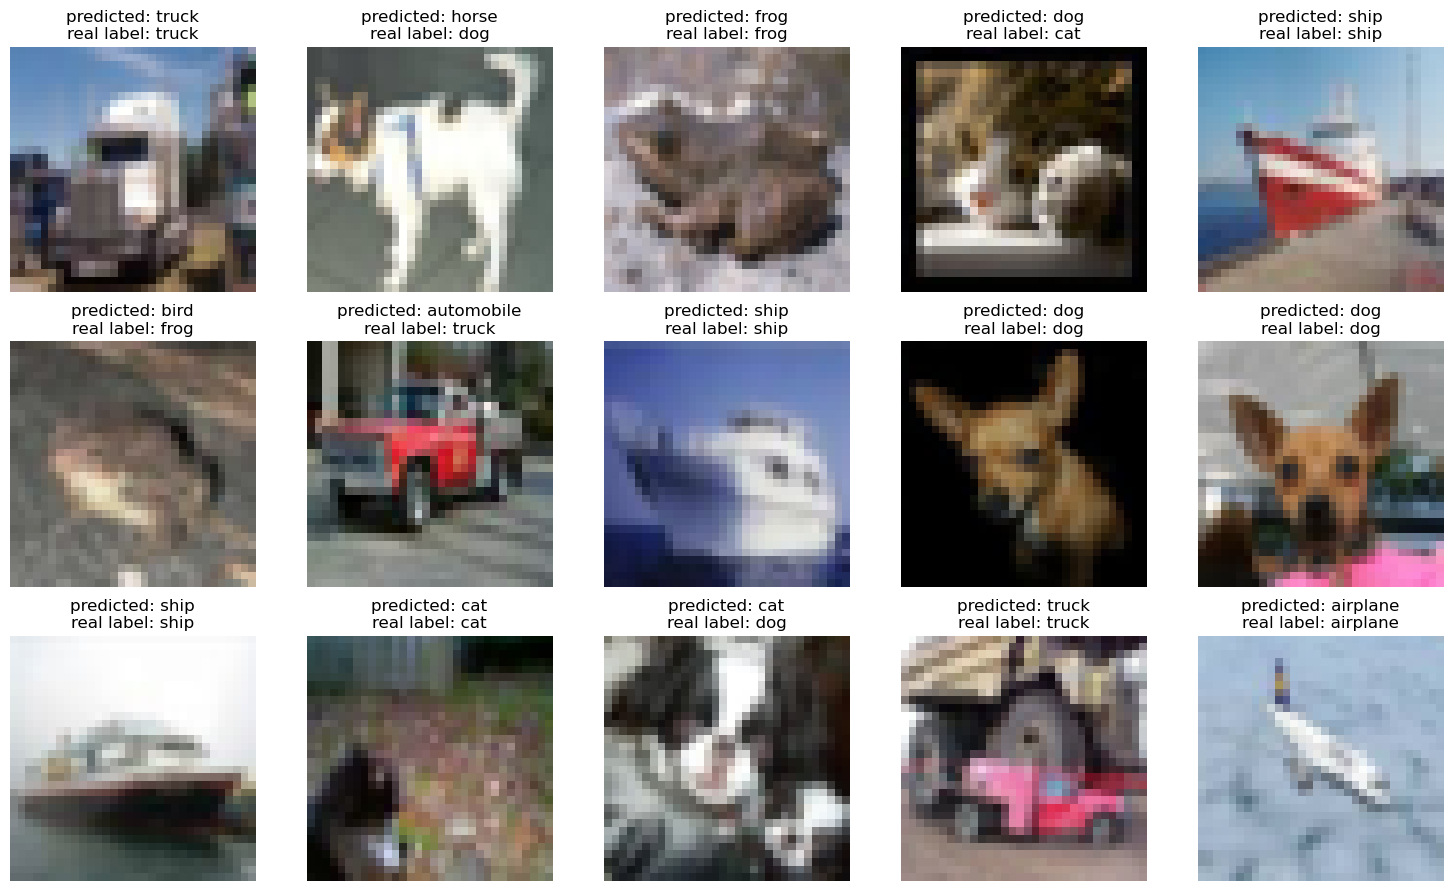

In [15]:
visualize_predictions(model)

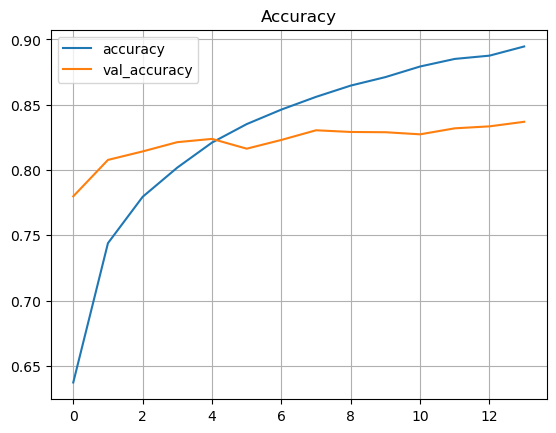

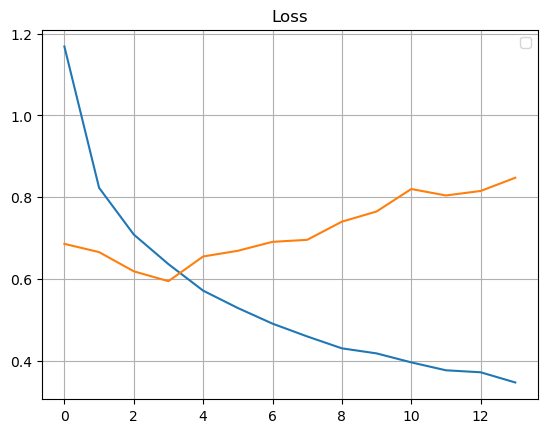

In [16]:
history_plot(history)

In [17]:
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, None, None, 1280)  2257984  
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 128)               8028288   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

In [19]:
callbacks[0] = keras.callbacks.ModelCheckpoint("../models/mn_model_finetune.keras", save_best_only=True,
                                               monitor="val_loss", verbose=2)


In [21]:
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=callbacks)

Epoch 1/50
625/625 [==============================] - ETA: 0s - loss: 0.5384 - accuracy: 0.8303
Epoch 1: val_loss did not improve from 0.65212
625/625 [==============================] - 32s 50ms/step - loss: 0.5384 - accuracy: 0.8303 - val_loss: 0.6803 - val_accuracy: 0.8276
Epoch 2/50
625/625 [==============================] - ETA: 0s - loss: 0.4933 - accuracy: 0.8451
Epoch 2: val_loss did not improve from 0.65212
625/625 [==============================] - 31s 49ms/step - loss: 0.4933 - accuracy: 0.8451 - val_loss: 0.6772 - val_accuracy: 0.8309
Epoch 3/50
625/625 [==============================] - ETA: 0s - loss: 0.4566 - accuracy: 0.8569
Epoch 3: val_loss did not improve from 0.65212
625/625 [==============================] - 31s 49ms/step - loss: 0.4566 - accuracy: 0.8569 - val_loss: 0.7438 - val_accuracy: 0.8258
Epoch 4/50
625/625 [==============================] - ETA: 0s - loss: 0.4279 - accuracy: 0.8667
Epoch 4: val_loss did not improve from 0.65212
625/625 [====================

In [3]:
model = tf.keras.models.load_model("models/mn_model.keras")

model.evaluate(x_test, y_test)

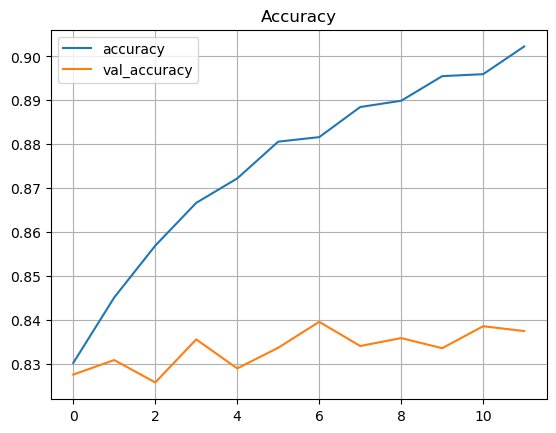

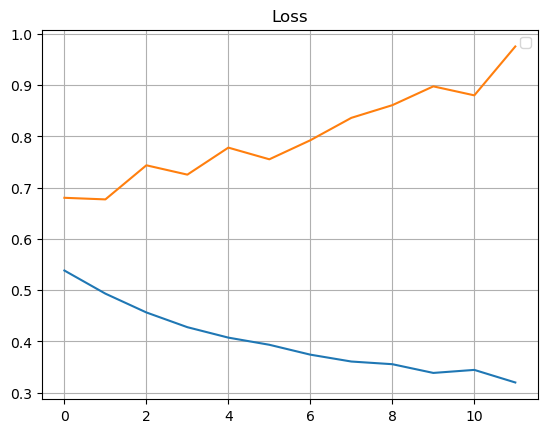

In [23]:
history_plot(history)

1/1 [==============================] - 1s 724ms/step
 Labels:      [9 7 0 6 8 4 9 0 1 8 9 6 3 9 2]
 Predictions: [9 7 0 6 8 3 9 0 9 8 9 6 3 9 2]


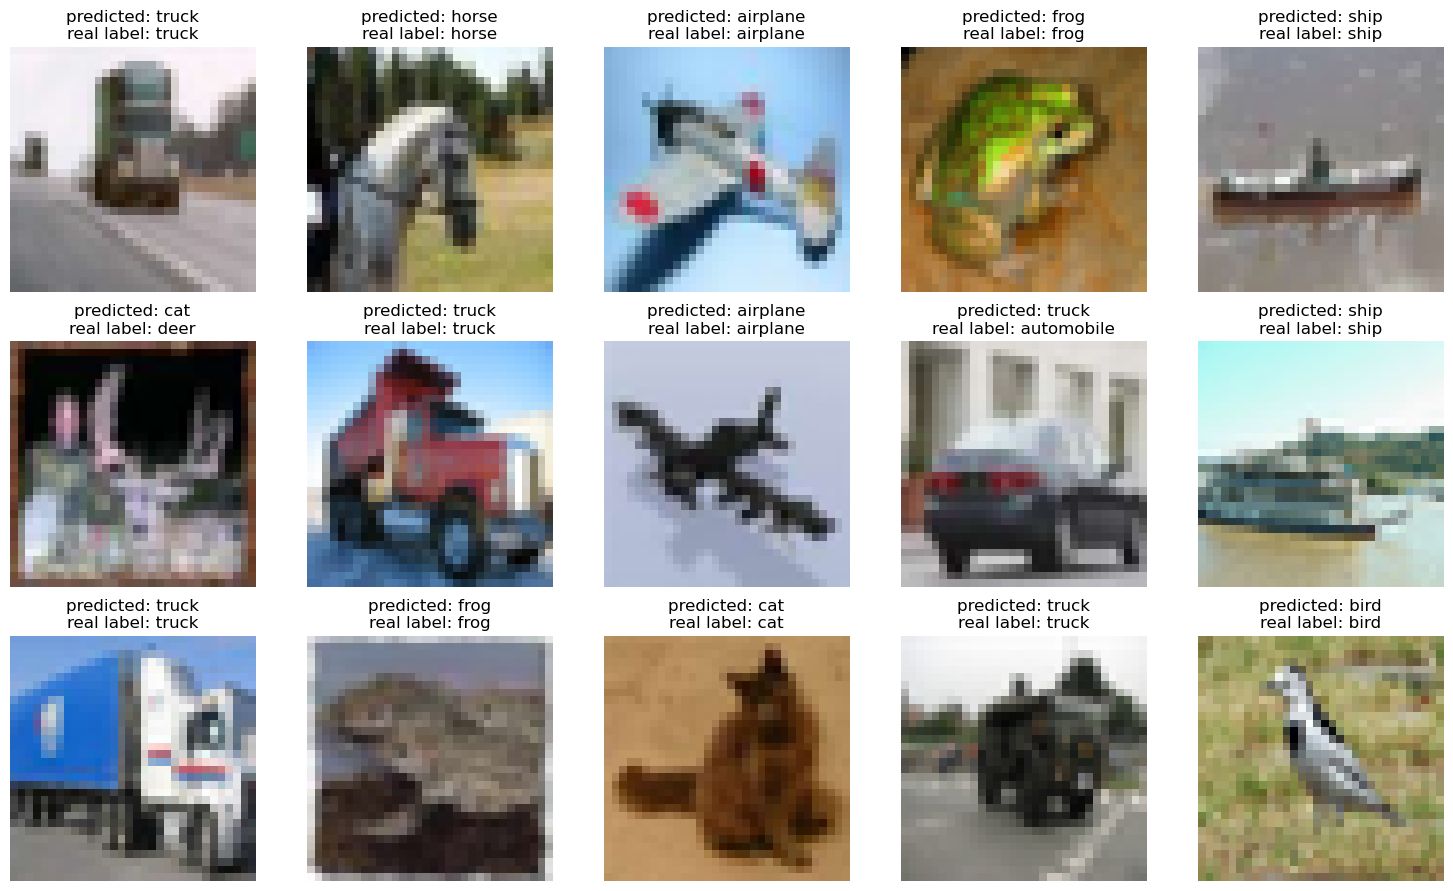

In [24]:
visualize_predictions(model)

313/313 [==============================] - 214s 675ms/step
Клас 0 (airplane): правильно класифіковано 811 з 1000 (81.10%)
Клас 1 (automobile): правильно класифіковано 919 з 1000 (91.90%)
Клас 2 (bird): правильно класифіковано 783 з 1000 (78.30%)
Клас 3 (cat): правильно класифіковано 736 з 1000 (73.60%)
Клас 4 (deer): правильно класифіковано 808 з 1000 (80.80%)
Клас 5 (dog): правильно класифіковано 734 з 1000 (73.40%)
Клас 6 (frog): правильно класифіковано 813 з 1000 (81.30%)
Клас 7 (horse): правильно класифіковано 801 з 1000 (80.10%)
Клас 8 (ship): правильно класифіковано 900 з 1000 (90.00%)
Клас 9 (truck): правильно класифіковано 909 з 1000 (90.90%)


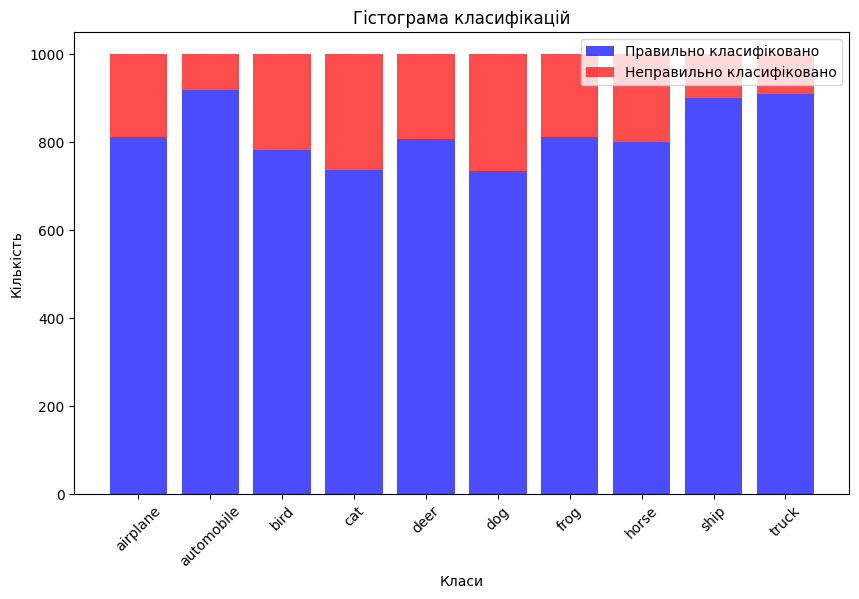

In [4]:
from results.functions import calculate_percent_right_mob

calculate_percent_right_mob(x_test, y_test, model=model)